# Содержание

1. [Задание 1](#задание-1)
2. []

In [32]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
np.random.seed(0)

df = pd.DataFrame(data={'a':np.random.randint(0, 100, 30),
                        'b':np.random.randint(0, 100, 30),
                        'c':np.random.randint(0, 100, 30)})
df.head()

,a,b,c
0,44,47,17
1,47,64,79
2,64,82,4
3,67,99,42
4,67,88,58


# Задание 1

Создайте фигуру с размером 15x8 и двумя подграфами, верхний и нижний.

Нарисуйте две линии в верхней оси, одна зеленая и одна оранжевая.

Добавьте легенду для верхней линии, *Green* и *Orange*. Поместите эту легенду в центр верхней части графика.

**Дополнительное задание**: В нижней оси создайте график только данных, отмеченный кругами, но без линей, соединяющей точки.

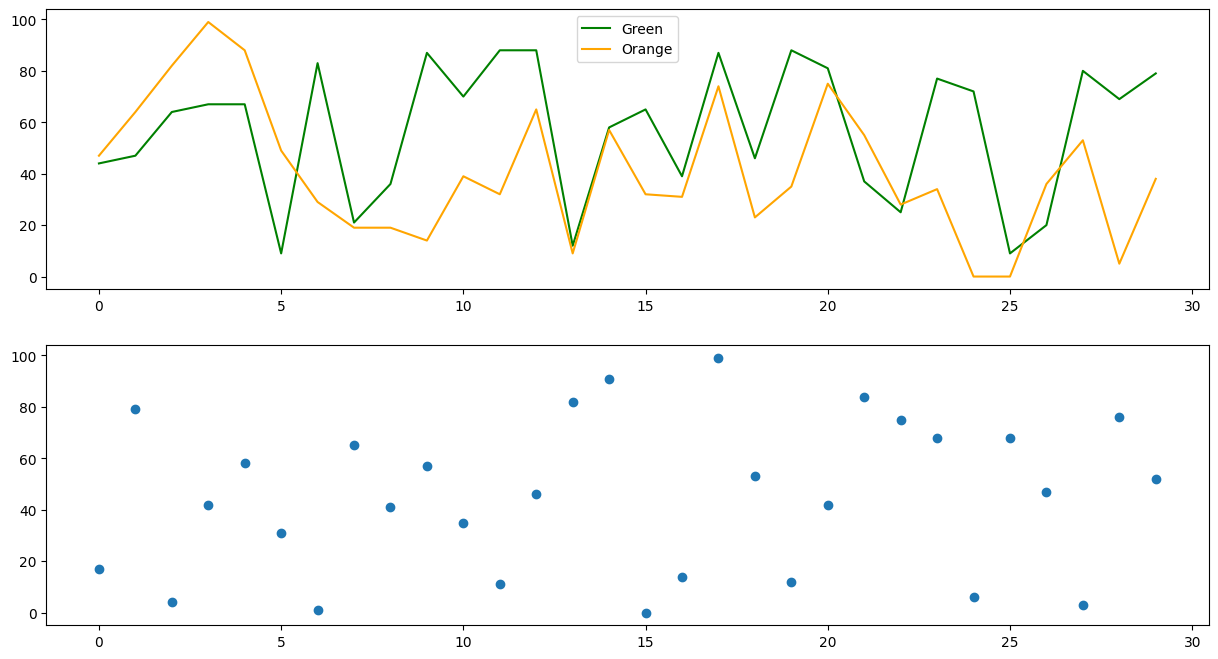

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))


ax[0].plot(df.index.values, df['a'], color='g', label='Green')
ax[0].plot(df.index.values, df['b'], color='orange', label='Orange')

ax[0].legend(loc='upper center')

ax[1].plot(df.index.values, df['c'], 'o')

# Задание 2

Создайте фигуру с 3 подграфиками, расположенными вертикально.

Создайте столбчатую диаграмму для `a` и `b` на первых двух подграфах, а на последнем нарисуйте `a` и `b` вместе, но `b` расположите поверх `a`. (Подсказка: используйте аргумент `bottom`)

Убедитесь, что цвета `a` и `b` постоянны на всех подграфах.

**Дополнительное задание**: укажите числовое значение каждого столбца над ним.

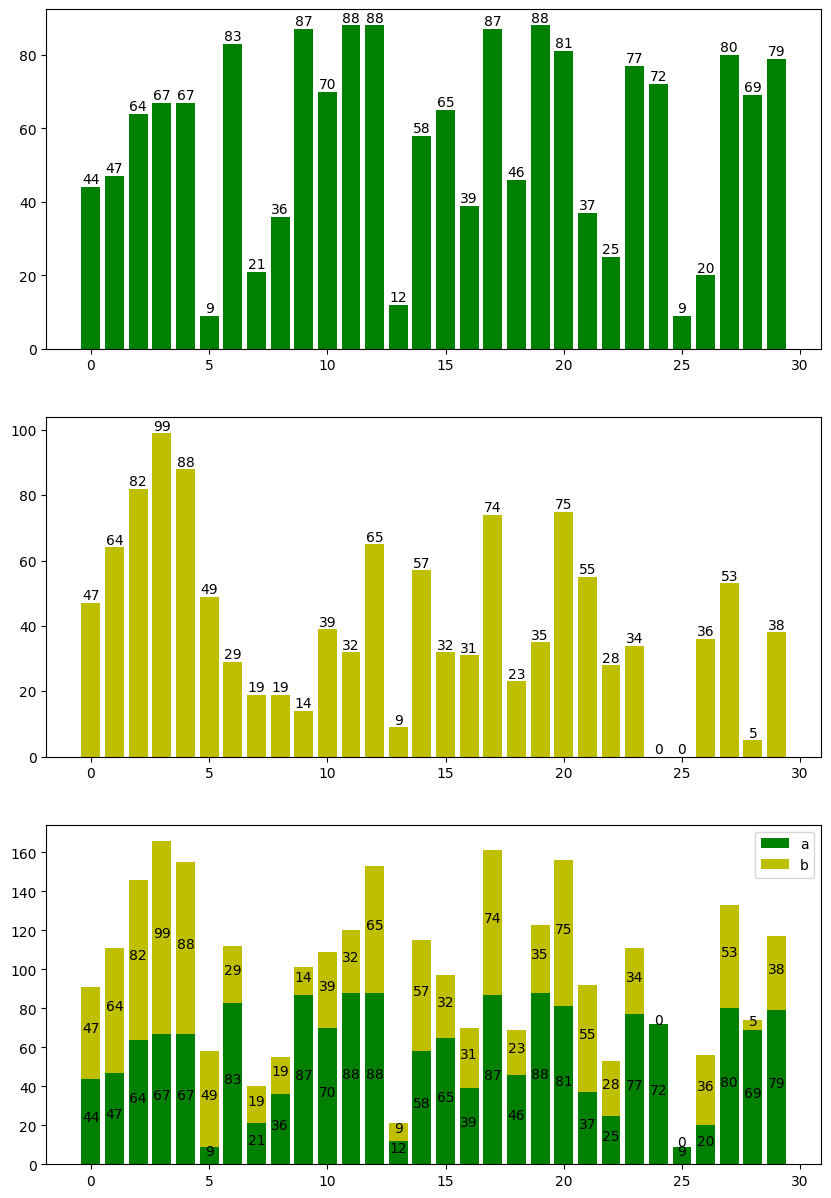

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))


ax[0].bar(df.index.values, df['a'], color='g')

for i, value in enumerate(df['a']):
    ax[0].text(i, value + 1, str(value), ha='center')

ax[1].bar(df.index.values, df['b'], color='y')

for i, value in enumerate(df['b']):
    ax[1].text(i, value + 1, str(value), ha='center')


ax[2].bar(df.index.values, df['a'], color='g', label='a')
ax[2].bar(df.index.values, df['b'], bottom=df['a'], color='y', label='b')

for i, value in enumerate(df['a']):
    ax[2].text(i, value / 2, str(value), ha='center')

for i, (value_a, value_b) in enumerate(zip(df['a'], df['b'])):
    ax[2].text(i, value_a + value_b / 2, str(value_b), ha='center')

ax[2].legend()

# Задание 3

Визуализируйте тестовые данные представленные ниже.

Создайте столбчатую диаграмму, отображающую оборот (turnover) каждого рынка.

Помните, что избыточная информация усложняет восприятие, делайте все разумно.

Используйте подписи, чтобы график был понятен.

**Дополнительное задание**: на противоположной оси, нарисуйте линию показывающую долю каждого рынка (share). (Подсказка: используйте `ax.twinx()`)

In [50]:
np.random.seed(0)

turnover_data = pd.DataFrame({'boardid' : ['DAY', 'DAY_X', 'DAY_U', 'TSE'], 
                              'turnover' : np.random.randint(1e6, 1e9, 4)})

turnover_data = turnover_data.sort_values(by='turnover').reset_index().drop('index', axis=1)

turnover_data['turnover_simplified'] = turnover_data['turnover'] // 1000000

turnover_data['market_share'] = round((turnover_data['turnover'] / sum(turnover_data['turnover'])*100), 1)

turnover_data

,boardid,turnover,turnover_simplified,market_share
0,DAY,210652396,210,10.8
1,DAY_X,399764591,399,20.6
2,TSE,405868288,405,20.9
3,DAY_U,925231285,925,47.7


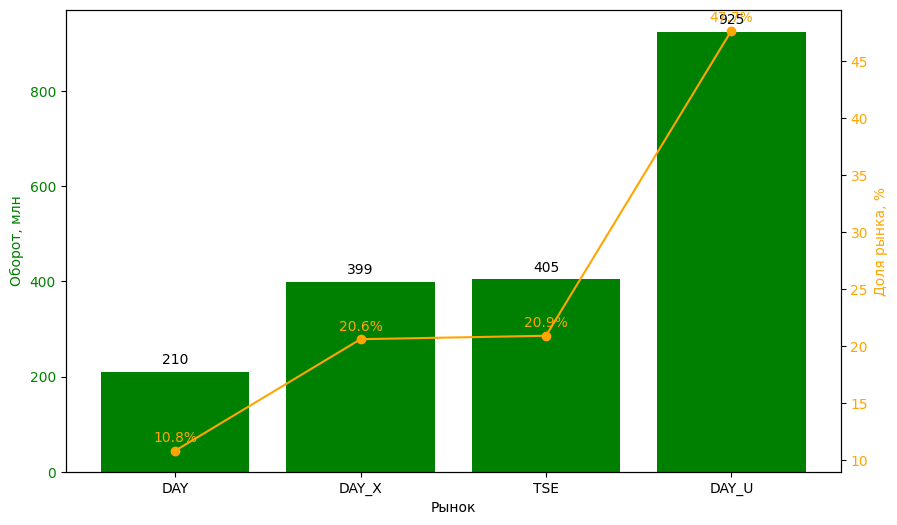

In [58]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Столбчатая диаграмма оборота
ax1.bar(turnover_data['boardid'], turnover_data['turnover_simplified'], color='g')
ax1.set_xlabel('Рынок')
ax1.set_ylabel('Оборот, млн', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Доли рынка
ax2 = ax1.twinx()
ax2.plot(turnover_data['boardid'], turnover_data['market_share'], color='orange', marker='o')
ax2.set_ylabel('Доля рынка, %', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Добавление подписей
for i, val in enumerate(turnover_data['turnover_simplified']):
    ax1.text(i, val + 10, f'{val}', ha='center', va='bottom', color='black')

for i, val in enumerate(turnover_data['market_share']):
    ax2.text(i, val + 0.5, f'{val}%', ha='center', va='bottom', color='orange')

# Задание 4

Постройте 4 графика различных математических функций.

## $y = 2x + 1$

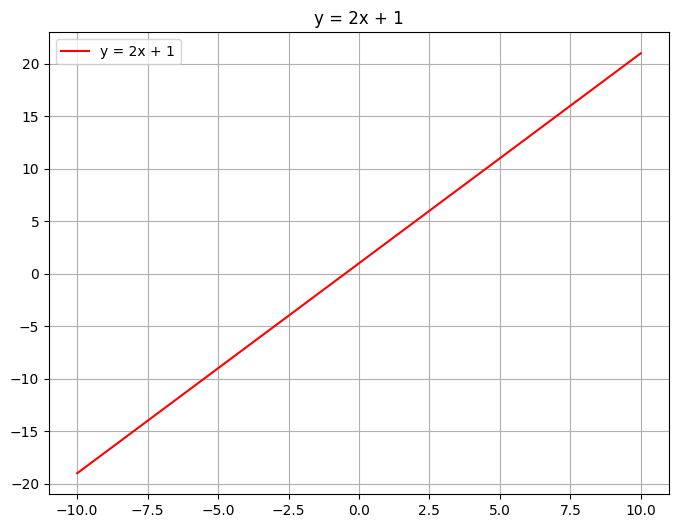

In [64]:
x = np.linspace(-10, 10, 400)

y1 = 2 * x + 1

plt.figure(figsize=(8, 6))
plt.plot(x, y1, 'r', label='y = 2x + 1')
plt.title('y = 2x + 1')
plt.legend()
plt.grid(True)

## $y = x^2$

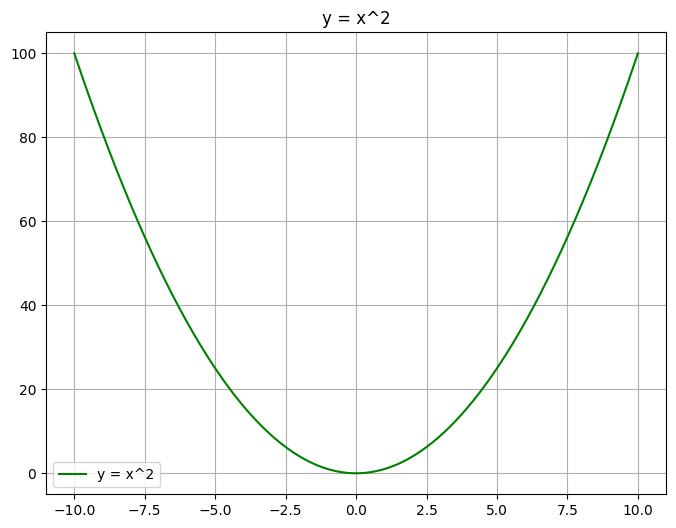

In [61]:
x = np.linspace(-10, 10, 400)
y2 = x ** 2

plt.figure(figsize=(8, 6))
plt.plot(x, y2, 'g', label='y = x^2')
plt.title('y = x^2')
plt.legend()
plt.grid(True)

## $y = sin(x)$

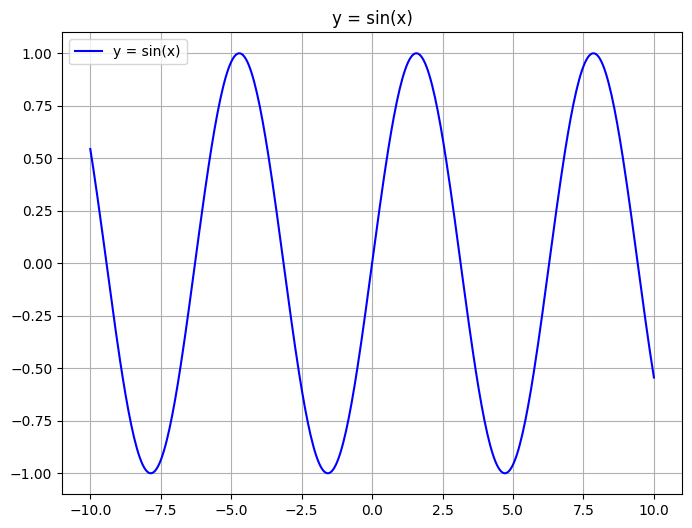

In [62]:
x = np.linspace(-10, 10, 400)
y3 = np.sin(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y3, 'b', label='y = sin(x)')
plt.title('y = sin(x)')
plt.legend()
plt.grid(True)

## $y = \frac{1}{1 + e^(-x)}$ 
[Wiki: Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function)

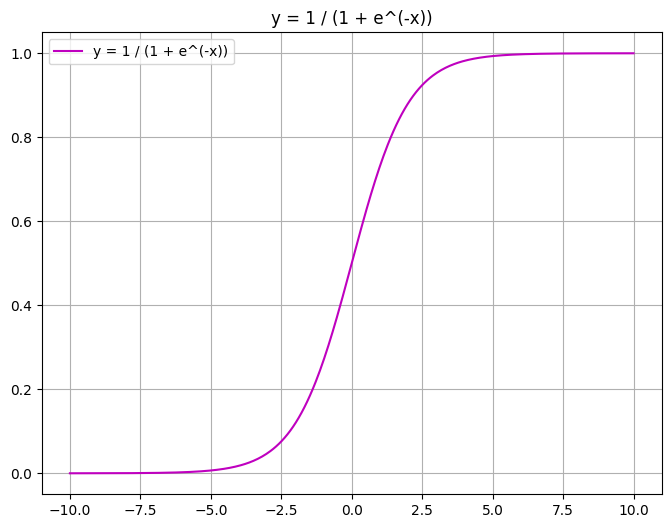

In [65]:
import math
e = math.e

x = np.linspace(-10, 10, 400)
y4 = 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 6))
plt.plot(x, y4, 'm', label='y = 1 / (1 + e^(-x))')
plt.title('y = 1 / (1 + e^(-x))')
plt.legend()
plt.grid(True)

# Задание 5

Для следующих 2 заданий будем использовать датасет со стоимостью биткоин, который содержит `Date` и `Price` за день.

In [66]:
bitcoin = pd.read_csv("Bitcoin.csv")
bitcoin.head()

,Date,Price
0,2017/10/8,4596.96
1,2017/10/15,5697.39
2,2017/10/22,5984.96
3,2017/10/29,6140.53
4,2017/11/5,7382.45


## Линейный график

Нарисуйте линейный график изменения цены.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


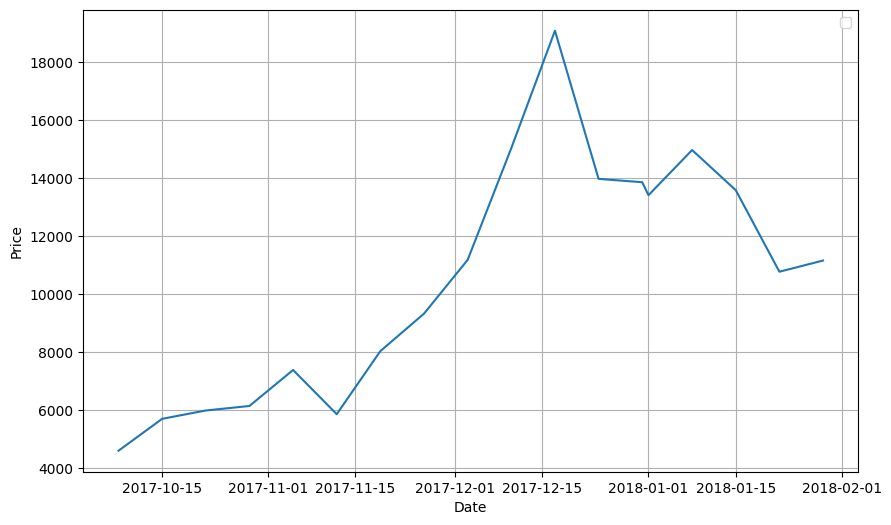

In [71]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

plt.figure(figsize=(10, 6))
plt.plot(bitcoin['Date'], bitcoin['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

## Столбчатая диаграмма

Нарисуйте столбчатую диаграмму изменения цены.

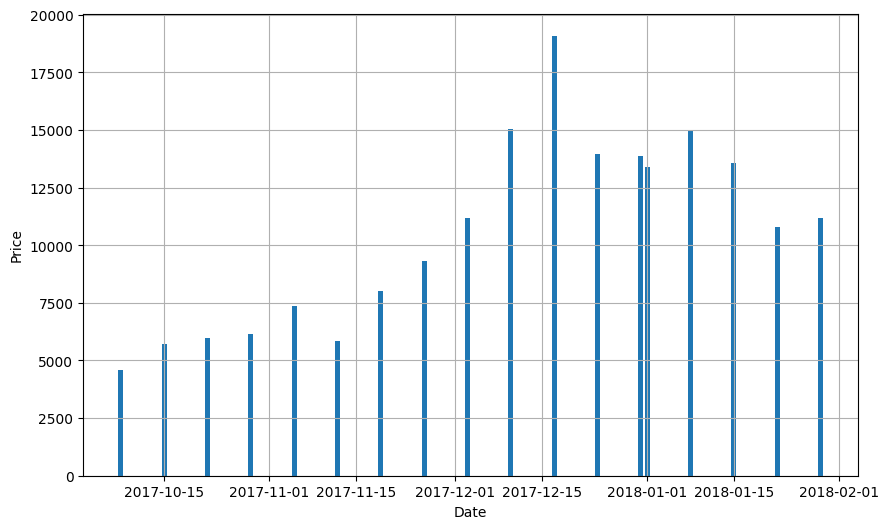

In [72]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

plt.figure(figsize=(10, 6))
plt.bar(bitcoin['Date'], bitcoin['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)


# Задание 6
Используя данные из `world2015.csv` постройте график отношения `Population` и `GDP_per_capita` используя `Scatter Chart`.

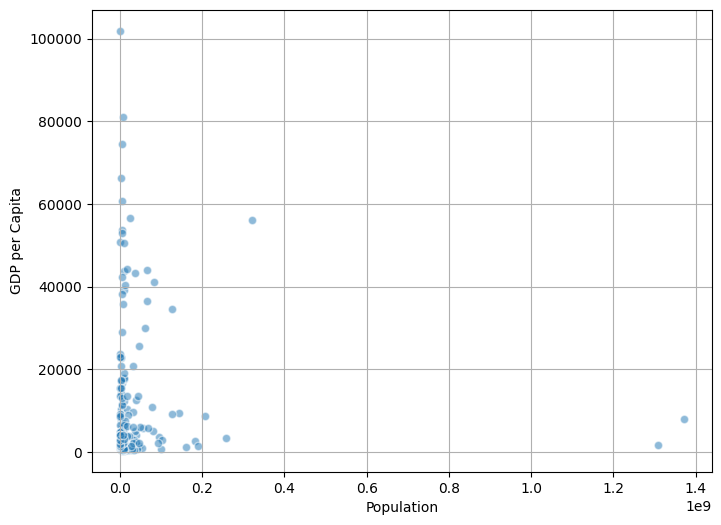

In [87]:
db = pd.read_csv("world2015.csv")

plt.figure(figsize=(8, 6))
plt.scatter(db['Population'], db['GDP_per_capita'], alpha=0.5, edgecolors='w')
plt.xlabel('Population')
plt.ylabel('GDP per Capita')
plt.grid(True)

# Задание 7
Постройте концентрические круговые диаграммы, используя данные ниже.

In [103]:
# pie chart 1
labels=['Python','Java','C++','Ruby']
values=[20,30,40,10]
colors=['yellow','green','red','blue']
explode = [0.2, 0, 0, 0]

# pie chart 2
labels2=["Amater", "Pro",
       "Amater", "Pro",
       "Amater", "Pro",
       "Amater", "Pro"]
values2 = [10,10,20,10,15,25,3,7]
colors2 = ["greenyellow", "khaki",
          "limegreen", "olive",
          "darkorange", "salmon",
          "skyblue", "violet"]
explode2 = [0.2, 0.2, 0, 0, 0, 0, 0, 0]

(-1.8518528741940363,
 1.6596005355202852,
 -1.6499980865236894,
 1.6499998005602885)

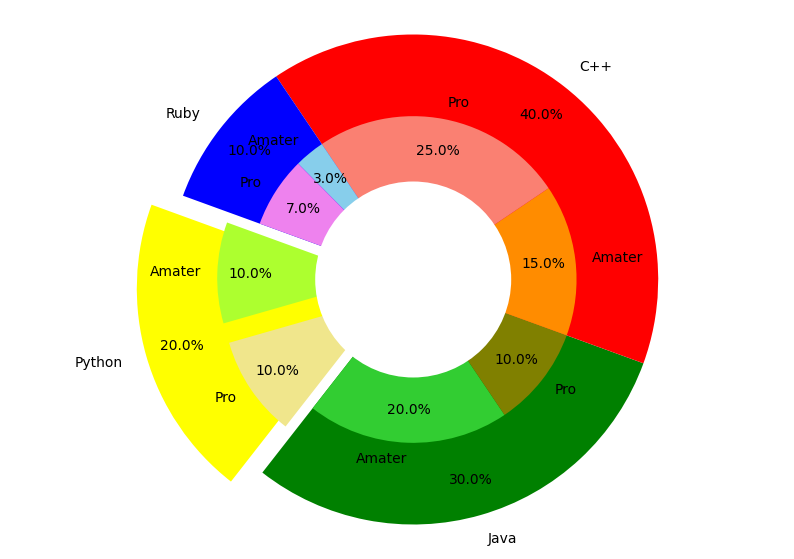

In [107]:

fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(values, labels=labels, colors=colors, explode=explode, radius=1.5,
       startangle=160, autopct='%1.1f%%', pctdistance=0.85)
ax.pie(values2, labels=labels2, colors=colors2, explode=explode2, radius=1,
       startangle=160, autopct='%1.1f%%', pctdistance=0.80)

center = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center)

ax.axis('equal')